# Trabajo Final por Camilo Serrano Patiño y Kevin Llanos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Gap = pd.read_csv("Global_active_power.csv") #Global_active_power
Gin = pd.read_csv("Global_intensity.csv") #Global_intensity
Grp = pd.read_csv("Global_reactive_power.csv") #Global_reactive_power
V = pd.read_csv("Voltage.csv") #Voltage

## 1. Lectura de los 4 archivos

In [3]:
Gap

,Datetime,Global_active_power
0,2010-01-01 00:00:00,1.790
1,2010-01-01 00:01:00,1.780
2,2010-01-01 00:02:00,1.780
3,2010-01-01 00:03:00,1.746
4,2010-01-01 00:04:00,1.686
...,...,...
457390,2010-11-26 20:58:00,0.946
457391,2010-11-26 20:59:00,0.944
457392,2010-11-26 21:00:00,0.938
457393,2010-11-26 21:01:00,0.934


In [4]:
Gin

,Datetime,Global_intensity
0,2010-01-01 00:00:00,7.4
1,2010-01-01 00:01:00,7.4
2,2010-01-01 00:02:00,7.4
3,2010-01-01 00:03:00,7.2
4,2010-01-01 00:04:00,7.0
...,...,...
457390,2010-11-26 20:58:00,4.0
457391,2010-11-26 20:59:00,4.0
457392,2010-11-26 21:00:00,3.8
457393,2010-11-26 21:01:00,3.8


In [5]:
Grp

,Datetime,Global_reactive_power
0,2010-01-01 00:00:00,0.236
1,2010-01-01 00:01:00,0.234
2,2010-01-01 00:02:00,0.234
3,2010-01-01 00:03:00,0.186
4,2010-01-01 00:04:00,0.102
...,...,...
457390,2010-11-26 20:58:00,0.000
457391,2010-11-26 20:59:00,0.000
457392,2010-11-26 21:00:00,0.000
457393,2010-11-26 21:01:00,0.000


In [6]:
V

,Datetime,Voltage
0,2010-01-01 00:00:00,240.65
1,2010-01-01 00:01:00,240.07
2,2010-01-01 00:02:00,240.15
3,2010-01-01 00:03:00,240.26
4,2010-01-01 00:04:00,240.12
...,...,...
457390,2010-11-26 20:58:00,240.43
457391,2010-11-26 20:59:00,240.00
457392,2010-11-26 21:00:00,239.82
457393,2010-11-26 21:01:00,239.70


## 2. Combinación de los archivos

In [7]:
data = pd.merge(pd.merge(Gap, Gin), pd.merge(Grp, V))
data

,Datetime,Global_active_power,Global_intensity,Global_reactive_power,Voltage
0,2010-01-01 00:00:00,1.790,7.4,0.236,240.65
1,2010-01-01 00:01:00,1.780,7.4,0.234,240.07
2,2010-01-01 00:02:00,1.780,7.4,0.234,240.15
3,2010-01-01 00:03:00,1.746,7.2,0.186,240.26
4,2010-01-01 00:04:00,1.686,7.0,0.102,240.12
...,...,...,...,...,...
457390,2010-11-26 20:58:00,0.946,4.0,0.000,240.43
457391,2010-11-26 20:59:00,0.944,4.0,0.000,240.00
457392,2010-11-26 21:00:00,0.938,3.8,0.000,239.82
457393,2010-11-26 21:01:00,0.934,3.8,0.000,239.70


## 3. Resample de los datos

In [8]:
data["Datetime"] = pd.to_datetime(data["Datetime"])

In [9]:
data = data.set_index("Datetime")

### Datos en escala de días

In [10]:
data_d = data.resample("D").mean()
data_d

,Global_active_power,Global_intensity,Global_reactive_power,Voltage
Datetime,,,,
2010-01-01,0.850175,3.537083,0.114817,242.565722
2010-01-02,1.176235,4.857778,0.086656,243.631743
2010-01-03,0.901894,3.757778,0.090331,241.822778
2010-01-04,1.171833,4.879028,0.100322,241.754160
2010-01-05,0.916776,3.929861,0.133697,240.647167
...,...,...,...,...
2010-12-07,0.770538,3.397222,0.198550,240.218646
2010-12-08,0.367846,1.623750,0.117429,240.794931
2010-12-09,1.119508,4.755694,0.139832,241.619722


### Datos en escala de meses

In [11]:
data_m = data.resample("M").mean()
data_m

,Global_active_power,Global_intensity,Global_reactive_power,Voltage
Datetime,,,,
2010-01-31,1.300640,5.430332,0.125182,242.338522
2010-02-28,1.157539,4.836624,0.109467,242.002101
2010-03-31,1.170015,4.920399,0.136368,241.475284
2010-04-30,1.036334,4.363496,0.129557,241.442527
2010-05-31,1.075957,4.551504,0.127221,241.296151
2010-06-30,0.975306,4.170282,0.145525,240.888985
2010-07-31,0.778947,3.337202,0.138093,240.965167
2010-08-31,0.929452,3.954423,0.130815,241.422944
2010-09-30,0.997541,4.223837,0.127700,241.267517


## 4. Modelo de regresión

In [12]:
from scipy.optimize import curve_fit

In [13]:
ii = data["Global_active_power"] < 1.005
data = data[ii]

C:\Users\serra\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


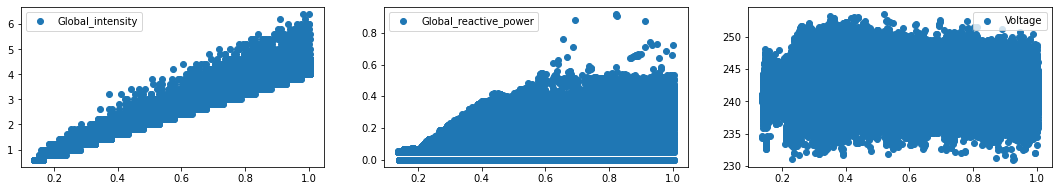

In [14]:
plt.figure(figsize = (25, 10))
for i, j in enumerate(data.columns[1:]):
    plt.subplot(3, 4, i+1)
    plt.scatter(data["Global_active_power"], data[j], label = j)
    plt.legend()
plt.show()

In [15]:
p = np.random.random(len(data[ii]))
kk = p < 0.03

<ipython-input-15-1056151dbd5d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p = np.random.random(len(data[ii]))


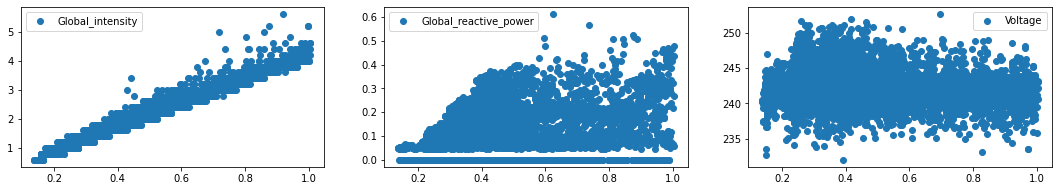

In [16]:
plt.figure(figsize = (25, 10))
for i, j in enumerate(data.columns[1:]):
    plt.subplot(3, 4, i+1)
    plt.scatter(data["Global_active_power"][kk], data[j][kk], label = j)
    plt.legend()
plt.show()

In [17]:
def func1(x, a, b):
    return a*x + b

def func2(x, a, b, c):
    return a*x**2 + b*x + c

def func3(x, a, b, c):
    return a*np.exp(b*x) + c

In [18]:
def get_fit(func, xdata, ydata, labelx, labely, r):
    popt, pcov = curve_fit(func, xdata, ydata)
    popt, pcov = np.around(popt,r), np.around(np.sqrt(np.diag(pcov)), r)
    x = np.linspace(xdata.min(), xdata.max(), 100)
    plt.figure(figsize = (8, 6))
    plt.plot(x, func(x, *popt), 'r-', label = r'fit: {}$\pm${}'.format(np.around(tuple(popt), r), tuple(pcov)))
    plt.scatter(xdata, ydata, label = "Original data")
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.legend()
    plt.show()
    print("Coeficients are : {}".format(popt))
    print("Sigma_Coeficients are : {}".format(pcov))
    return #popt, np.sqrt(np.diag(pcov))

### Global active power con Global intensity Lineal

#### Frecuencia: Minutos

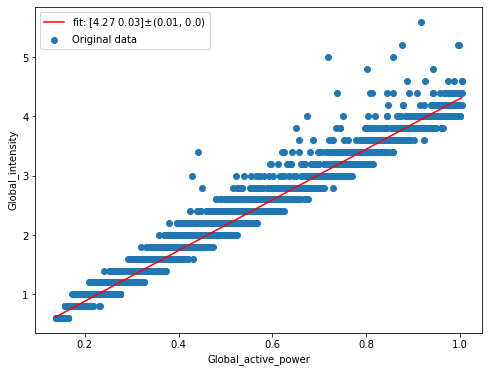

Coeficients are : [4.27 0.03]
Sigma_Coeficients are : [0.01 0.  ]


In [19]:
get_fit(func1, data["Global_active_power"][kk], data["Global_intensity"][kk], "Global_active_power", "Global_intensity", 2)

#### Frecuencia: Días

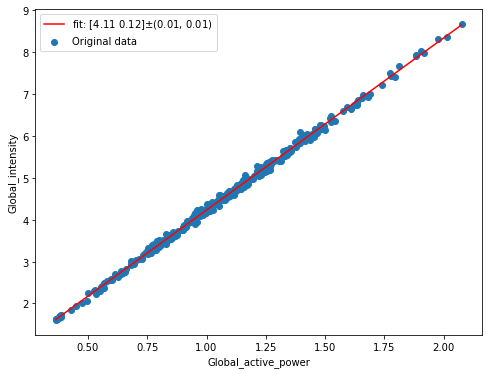

Coeficients are : [4.11 0.12]
Sigma_Coeficients are : [0.01 0.01]


In [20]:
get_fit(func1, data_d["Global_active_power"].dropna(), data_d["Global_intensity"].dropna(), "Global_active_power", "Global_intensity", 2)

#### Frecuencia: Meses

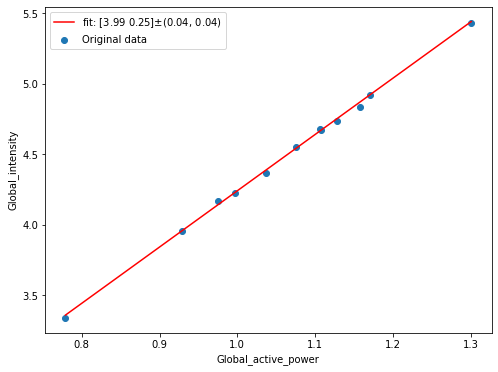

Coeficients are : [3.99 0.25]
Sigma_Coeficients are : [0.04 0.04]


In [21]:
get_fit(func1, data_m["Global_active_power"], data_m["Global_intensity"], "Global_active_power", "Global_intensity", 2)

### Global active power con Global reactive power Lineal

#### Frecuencia: Minutos

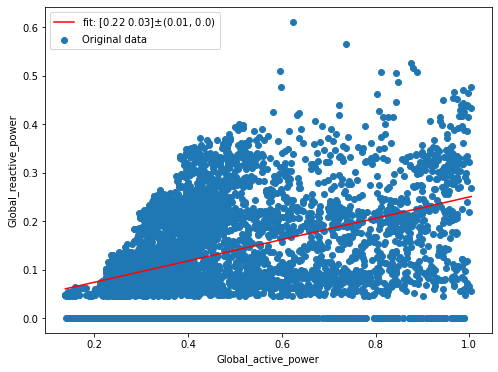

Coeficients are : [0.22 0.03]
Sigma_Coeficients are : [0.01 0.  ]


In [22]:
get_fit(func1, data["Global_active_power"][kk], data["Global_reactive_power"][kk], "Global_active_power", "Global_reactive_power", 2)

#### Frecuencia: Días

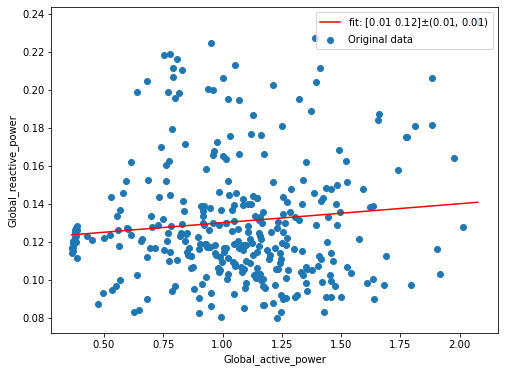

Coeficients are : [0.01 0.12]
Sigma_Coeficients are : [0.01 0.01]


In [23]:
get_fit(func1, data_d["Global_active_power"].dropna(), data_d["Global_reactive_power"].dropna(), "Global_active_power", "Global_reactive_power", 2)

#### Frecuencia: Meses

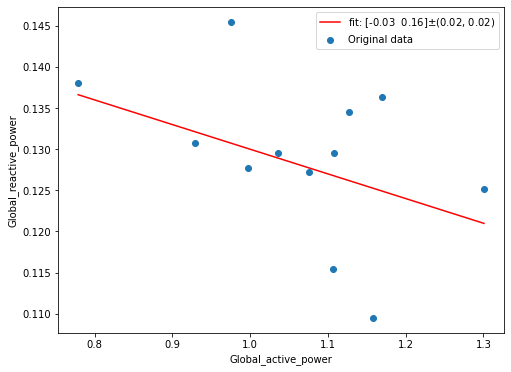

Coeficients are : [-0.03  0.16]
Sigma_Coeficients are : [0.02 0.02]


In [24]:
get_fit(func1, data_m["Global_active_power"], data_m["Global_reactive_power"], "Global_active_power", "Global_reactive_power", 2)

### Global active power con Global reactive power Cuadrática

#### Frecuencia: Minutos

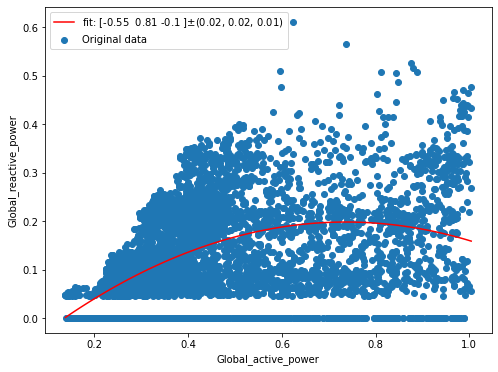

Coeficients are : [-0.55  0.81 -0.1 ]
Sigma_Coeficients are : [0.02 0.02 0.01]


In [25]:
get_fit(func2, data["Global_active_power"][kk], data["Global_reactive_power"][kk], "Global_active_power", "Global_reactive_power", 2)

#### Frecuencia: Días

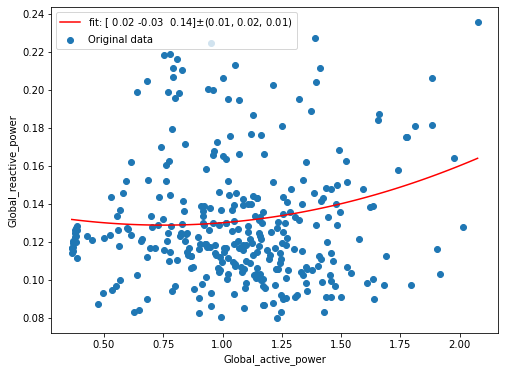

Coeficients are : [ 0.02 -0.03  0.14]
Sigma_Coeficients are : [0.01 0.02 0.01]


In [26]:
get_fit(func2, data_d["Global_active_power"].dropna(), data_d["Global_reactive_power"].dropna(), "Global_active_power", "Global_reactive_power", 2)

#### Frecuencia: Meses

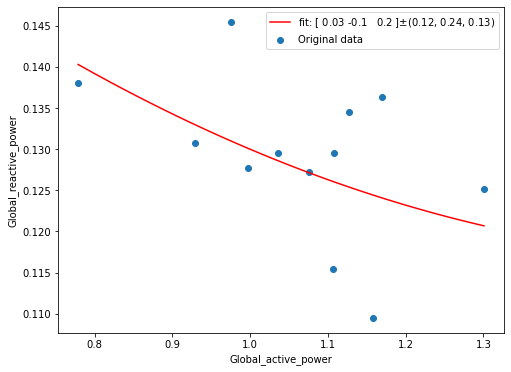

Coeficients are : [ 0.03 -0.1   0.2 ]
Sigma_Coeficients are : [0.12 0.24 0.13]


In [27]:
get_fit(func2, data_m["Global_active_power"], data_m["Global_reactive_power"], "Global_active_power", "Global_reactive_power", 2)

### Global active power con Voltage Lineal

#### Frecuencia: Minutos

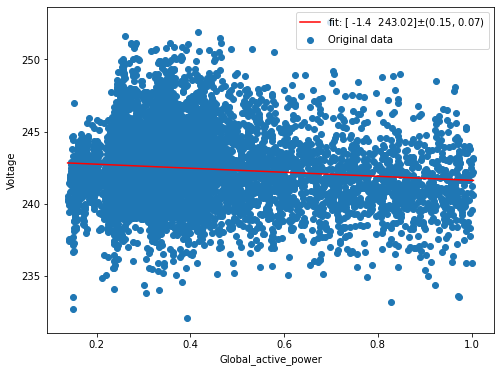

Coeficients are : [ -1.4  243.02]
Sigma_Coeficients are : [0.15 0.07]


In [28]:
get_fit(func1, data["Global_active_power"][kk], data["Voltage"][kk], "Global_active_power", "Voltage", 2)

#### Frecuencia: Días

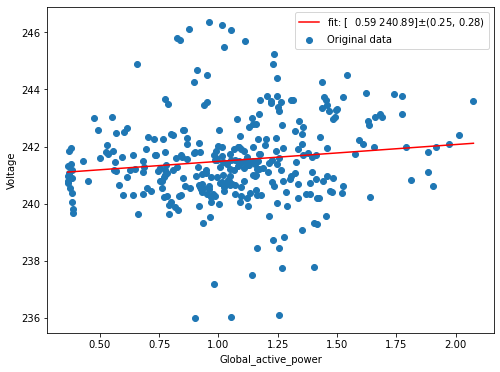

Coeficients are : [  0.59 240.89]
Sigma_Coeficients are : [0.25 0.28]


In [29]:
get_fit(func1, data_d["Global_active_power"].dropna(), data_d["Voltage"].dropna(), "Global_active_power", "Voltage", 2)

#### Frecuencia: Meses

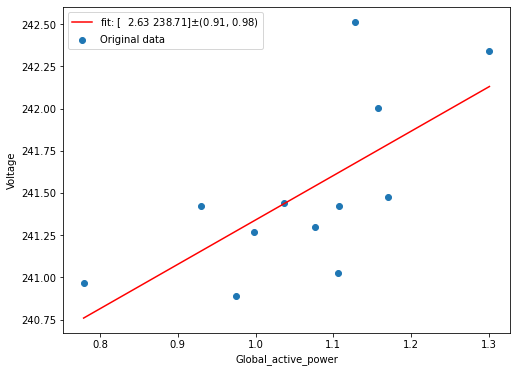

Coeficients are : [  2.63 238.71]
Sigma_Coeficients are : [0.91 0.98]


In [30]:
get_fit(func1, data_m["Global_active_power"], data_m["Voltage"], "Global_active_power", "Voltage", 2)

### Global active power con Voltage Cuadrática

#### Frecuencia: Minutos

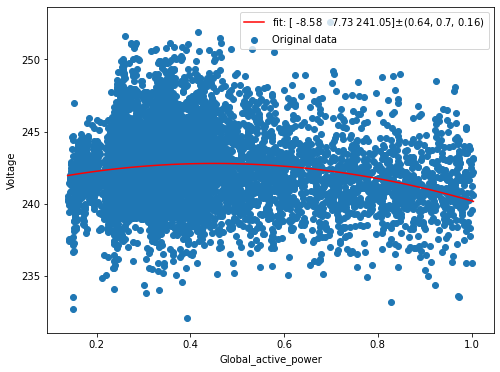

Coeficients are : [ -8.58   7.73 241.05]
Sigma_Coeficients are : [0.64 0.7  0.16]


In [31]:
get_fit(func2, data["Global_active_power"][kk], data["Voltage"][kk], "Global_active_power", "Voltage", 2)

#### Frecuencia: Días

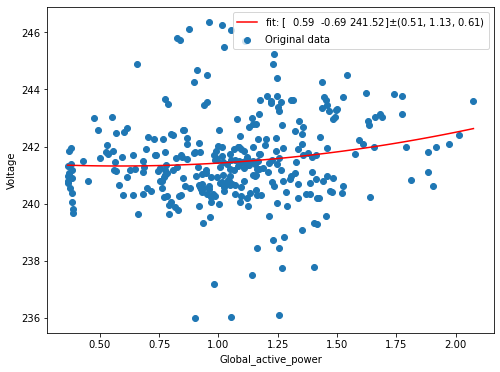

Coeficients are : [  0.59  -0.69 241.52]
Sigma_Coeficients are : [0.51 1.13 0.61]


In [32]:
get_fit(func2, data_d["Global_active_power"].dropna(), data_d["Voltage"].dropna(), "Global_active_power", "Voltage", 2)

#### Frecuencia: Meses

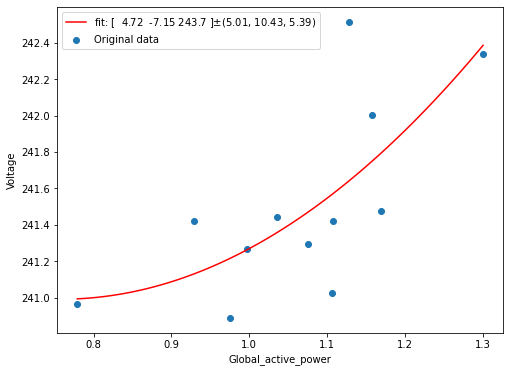

Coeficients are : [  4.72  -7.15 243.7 ]
Sigma_Coeficients are : [ 5.01 10.43  5.39]


In [33]:
get_fit(func2, data_m["Global_active_power"], data_m["Voltage"], "Global_active_power", "Voltage", 2)

### Global active power con Global intensity y Voltage Lineal

#### Frecuencia: Minutos

In [34]:
V_Grp = data["Global_intensity"][kk] + data["Voltage"][kk]

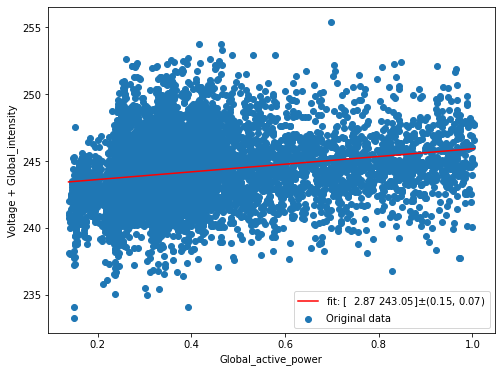

Coeficients are : [  2.87 243.05]
Sigma_Coeficients are : [0.15 0.07]


In [35]:
get_fit(func1, data["Global_active_power"][kk], V_Grp, "Global_active_power", "Voltage + Global_intensity", 2)

#### Frecuencia: Días

In [36]:
V_Grp_d = data_d["Global_intensity"].dropna() + data_d["Voltage"].dropna()

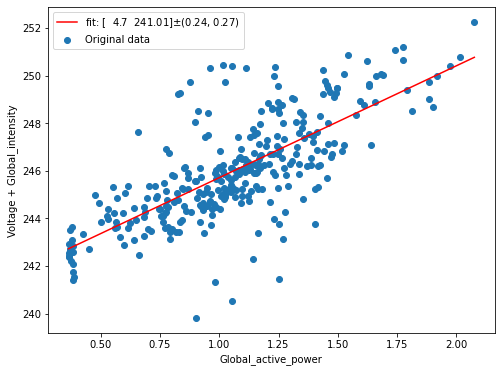

Coeficients are : [  4.7  241.01]
Sigma_Coeficients are : [0.24 0.27]


In [37]:
get_fit(func1, data_d["Global_active_power"].dropna(), V_Grp_d, "Global_active_power", "Voltage + Global_intensity", 2)

#### Frecuencia: Meses

In [38]:
V_Grp_m = data_m["Global_intensity"] + data_m["Voltage"]

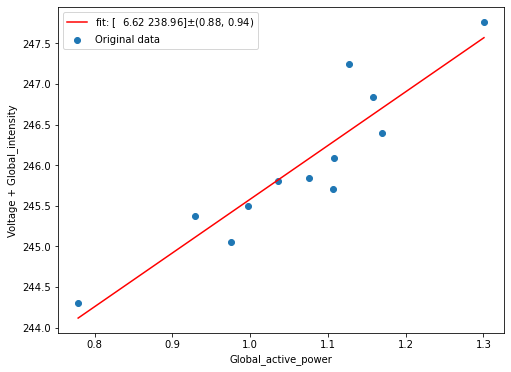

Coeficients are : [  6.62 238.96]
Sigma_Coeficients are : [0.88 0.94]


In [39]:
get_fit(func1, data_m["Global_active_power"], V_Grp_m, "Global_active_power", "Voltage + Global_intensity", 2)

### Global active power con Global intensity y Voltage Cuadrática

#### Frecuencia: Minutos

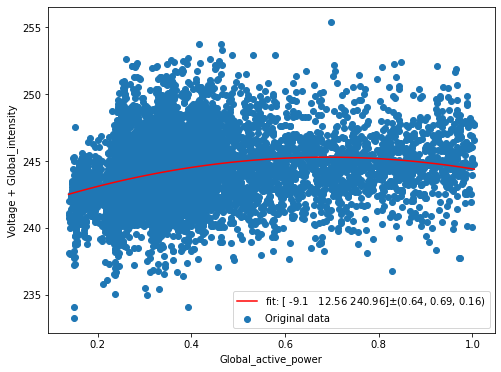

Coeficients are : [ -9.1   12.56 240.96]
Sigma_Coeficients are : [0.64 0.69 0.16]


In [40]:
get_fit(func2, data["Global_active_power"][kk], V_Grp, "Global_active_power", "Voltage + Global_intensity", 2)

#### Frecuencia: Días

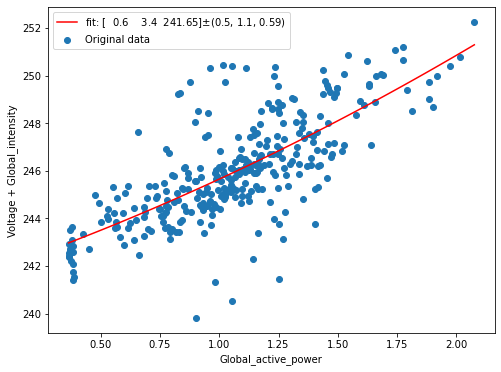

Coeficients are : [  0.6    3.4  241.65]
Sigma_Coeficients are : [0.5  1.1  0.59]


In [41]:
get_fit(func2, data_d["Global_active_power"].dropna(), V_Grp_d, "Global_active_power", "Voltage + Global_intensity", 2)

#### Frecuencia: Meses

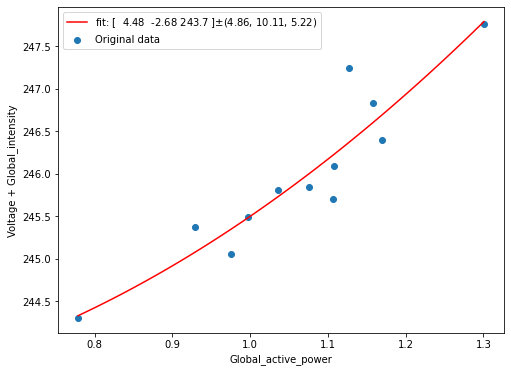

Coeficients are : [  4.48  -2.68 243.7 ]
Sigma_Coeficients are : [ 4.86 10.11  5.22]


In [42]:
get_fit(func2, data_m["Global_active_power"], V_Grp_m, "Global_active_power", "Voltage + Global_intensity", 2)

## 5. Comparación de las relaciones

In [43]:
def get_fit2(func, xdata, ydata, labelx, labely, r):
    popt, pcov = curve_fit(func, xdata, ydata)
    popt, pcov = np.around(popt, r), np.around(pcov, r)
    x = np.linspace(xdata.min(), xdata.max(), 100)
    E = np.sqrt(np.mean((ydata - func(xdata, *popt))**2))
    print("Error on fit is ={}".format(E))
    return popt, pcov

### Global active power con Global intensity Lineal

### Frecuencia: Minutos

In [44]:
get_fit2(func1, data["Global_active_power"][kk], data["Global_intensity"][kk], "Global_active_power", "Global_intensity", 2)

Error on fit is =0.1477806755540865


(array([4.27, 0.03]),
 array([[ 0., -0.],
        [-0.,  0.]]))

### Frecuencia:Dias

In [45]:
get_fit2(func1, data_d["Global_active_power"].dropna(), data_d["Global_intensity"].dropna(), "Global_active_power", "Global_intensity", 2)

Error on fit is =0.06262995164748553


(array([4.11, 0.12]),
 array([[ 0., -0.],
        [-0.,  0.]]))

### Frecuencia:Meses

In [46]:
get_fit2(func1, data_m["Global_active_power"], data_m["Global_intensity"], "Global_active_power", "Global_intensity", 2)

Error on fit is =0.017036491738909938


(array([3.99, 0.25]),
 array([[ 0., -0.],
        [-0.,  0.]]))

### Global active power con Global reactive power Lineal

### Frecuencia:Minutos

In [47]:
get_fit2(func1, data["Global_active_power"][kk], data["Global_reactive_power"][kk], "Global_active_power", "Global_reactive_power", 2)

Error on fit is =0.08711978809991038


(array([0.22, 0.03]),
 array([[ 0., -0.],
        [-0.,  0.]]))

### Frecuencia:Dias

In [48]:
get_fit2(func1, data_d["Global_active_power"].dropna(), data_d["Global_reactive_power"].dropna(), "Global_active_power", "Global_reactive_power", 2)

Error on fit is =0.03202595484938665


(array([0.01, 0.12]),
 array([[ 0., -0.],
        [-0.,  0.]]))

### Frecuencia:Meses

In [49]:
get_fit2(func1, data_m["Global_active_power"], data_m["Global_reactive_power"], "Global_active_power", "Global_reactive_power", 2)

Error on fit is =0.00834516975612739


(array([-0.03,  0.16]),
 array([[ 0., -0.],
        [-0.,  0.]]))

### Global active power con Global reactive power Cuadrática

### Frecuencia:Minutos

In [50]:
get_fit2(func2, data["Global_active_power"][kk], data["Global_reactive_power"][kk], "Global_active_power", "Global_reactive_power", 2)

Error on fit is =0.08361670317818355


(array([-0.55,  0.81, -0.1 ]),
 array([[ 0., -0.,  0.],
        [-0.,  0., -0.],
        [ 0., -0.,  0.]]))

### Frecuencia:Dias

In [51]:
get_fit2(func2, data_d["Global_active_power"].dropna(), data_d["Global_reactive_power"].dropna(), "Global_active_power", "Global_reactive_power", 2)

Error on fit is =0.032152596783399705


(array([ 0.02, -0.03,  0.14]),
 array([[ 0., -0.,  0.],
        [-0.,  0., -0.],
        [ 0., -0.,  0.]]))

### Frecuencia:Meses

In [52]:
get_fit2(func2, data_m["Global_active_power"], data_m["Global_reactive_power"], "Global_active_power", "Global_reactive_power", 2)

Error on fit is =0.008332443713052874


(array([ 0.03, -0.1 ,  0.2 ]),
 array([[ 0.01, -0.03,  0.01],
        [-0.03,  0.06, -0.03],
        [ 0.01, -0.03,  0.02]]))

### Global active power con Voltage Lineal

### Frecuencia:Minutos

In [53]:
get_fit2(func1, data["Global_active_power"][kk], data["Voltage"][kk], "Global_active_power", "Voltage", 2)

Error on fit is =2.5008888067990793


(array([ -1.4 , 243.02]),
 array([[ 0.02, -0.01],
        [-0.01,  0.  ]]))

### Frecuencia:Dias

In [54]:
get_fit2(func1, data_d["Global_active_power"].dropna(), data_d["Voltage"].dropna(), "Global_active_power", "Voltage", 2)

Error on fit is =1.5254561030776914


(array([  0.59, 240.89]),
 array([[ 0.06, -0.06],
        [-0.06,  0.08]]))

### Frecuencia:Meses

In [55]:
get_fit2(func1, data_m["Global_active_power"], data_m["Voltage"], "Global_active_power", "Voltage", 2)

Error on fit is =0.36848305056952185


(array([  2.63, 238.71]),
 array([[ 0.83, -0.88],
        [-0.88,  0.95]]))

### Global active power con Voltage Cuadrática

### Frecuencia:Minutos

In [56]:
get_fit2(func2, data["Global_active_power"][kk], data["Voltage"][kk], "Global_active_power", "Voltage", 2)

Error on fit is =2.472399096643856


(array([ -8.58,   7.73, 241.05]),
 array([[ 0.41, -0.44,  0.1 ],
        [-0.44,  0.49, -0.11],
        [ 0.1 , -0.11,  0.03]]))

### Frecuencia:Dias

In [57]:
get_fit2(func2, data_d["Global_active_power"].dropna(), data_d["Voltage"].dropna(), "Global_active_power", "Voltage", 2)

Error on fit is =1.5222431609944305


(array([  0.59,  -0.69, 241.52]),
 array([[ 0.26, -0.56,  0.27],
        [-0.56,  1.28, -0.66],
        [ 0.27, -0.66,  0.37]]))

### Frecuencia:Meses

In [58]:
get_fit2(func2, data_m["Global_active_power"], data_m["Voltage"], "Global_active_power", "Voltage", 2)

Error on fit is =0.35164436133868177


(array([  4.72,  -7.15, 243.7 ]),
 array([[ 25.11, -52.05,  26.54],
        [-52.05, 108.72, -55.91],
        [ 26.54, -55.91,  29.02]]))

### Global active power con Global intensity y Voltage Lineal

### Frecuencia: Minutos

In [59]:
get_fit2(func1, data["Global_active_power"][kk], V_Grp, "Global_active_power", "Voltage + Global_intensity", 2)

Error on fit is =2.4754986162944568


(array([  2.87, 243.05]),
 array([[ 0.02, -0.01],
        [-0.01,  0.  ]]))

### Frecuencia: Dias

In [60]:
get_fit2(func1, data_d["Global_active_power"].dropna(), V_Grp_d, "Global_active_power", "Voltage + Global_intensity", 2)

Error on fit is =1.487638147324989


(array([  4.7 , 241.01]),
 array([[ 0.06, -0.06],
        [-0.06,  0.07]]))

### Frecuencia: Meses

In [61]:
get_fit2(func1, data_m["Global_active_power"], V_Grp_m, "Global_active_power", "Voltage + Global_intensity", 2)

Error on fit is =0.3568041521676813


(array([  6.62, 238.96]),
 array([[ 0.78, -0.83],
        [-0.83,  0.89]]))

### Global active power con Global intensity y Voltage Cuadrática

### Frecuencia: Minutos

In [62]:
get_fit2(func2, data["Global_active_power"][kk], V_Grp, "Global_active_power", "Voltage + Global_intensity", 2)

Error on fit is =2.4430779664037123


(array([ -9.1 ,  12.56, 240.96]),
 array([[ 0.4 , -0.43,  0.09],
        [-0.43,  0.48, -0.11],
        [ 0.09, -0.11,  0.03]]))

### Frecuencia: Dias

In [63]:
get_fit2(func2, data_d["Global_active_power"].dropna(), V_Grp_d, "Global_active_power", "Voltage + Global_intensity", 2)

Error on fit is =1.4842960611922345


(array([  0.6 ,   3.4 , 241.65]),
 array([[ 0.25, -0.53,  0.26],
        [-0.53,  1.22, -0.63],
        [ 0.26, -0.63,  0.35]]))

### Frecuencia: Meses

In [64]:
get_fit2(func2, data_m["Global_active_power"], V_Grp_m, "Global_active_power", "Voltage + Global_intensity", 2)

Error on fit is =0.3410099085504477


(array([  4.48,  -2.68, 243.7 ]),
 array([[ 23.62, -48.96,  24.97],
        [-48.96, 102.28, -52.59],
        [ 24.97, -52.59,  27.3 ]]))

### Conclusión

*Al momento de comparar entre las frecuencia de todos nos dimos cuenta que el que menos error tiene siempre son los meses. \
*La relacion entre Global active power con Global intensity es lineal porque es el que menos error tiene. \
*La relacion entre Global active power con Global reactive no tiene una en específico ya que el error que se tiene cuando se hace lineal o cuadratica es igual. \
*La relacion entre Global active power con Voltage es cuadratica porque es el que menos error tiene. \
*La relacion entre Global active power con Global intensity y Voltage es cuadratica porque es el que menos error tiene.